In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

AMI + Weather 데이터 로드

In [3]:
df = pd.read_csv("../data_csv/amiwea.csv", parse_dates=["timestamp"])
df = df.sort_values("timestamp")
df.head()

,timestamp,household_id,consumption,Season,temperature,humidity,windSpeed
0,2013-03-01 00:00:00,MAC000001,6.219,Spring,2.58,0.84,3.94
1,2013-03-01 01:00:00,MAC000001,5.510,Spring,2.97,0.84,3.35
2,2013-03-01 02:00:00,MAC000001,8.393,Spring,2.99,0.87,2.70
3,2013-03-01 03:00:00,MAC000001,6.876,Spring,3.03,0.87,2.51
4,2013-03-01 04:00:00,MAC000001,4.000,Spring,3.07,0.91,2.62


예측 결과 로드

In [4]:
pred = pd.read_csv("../data_csv/pred_xgb.csv", parse_dates=["timestamp"])
pred = pred.sort_values("timestamp")
pred.head()

,timestamp,actual,pred_xgb
0,2013-12-18 05:00:00,5.545,6.632373
1,2013-12-18 06:00:00,12.552,7.825272
2,2013-12-18 07:00:00,13.082,12.941123
3,2013-12-18 08:00:00,19.054,11.586874
4,2013-12-18 09:00:00,7.159,12.513745


실제값 + 예측값 병합

In [9]:
df_merge = df.merge(
    pred[["timestamp", "pred_xgb"]],
    on="timestamp",
    how="inner"
)

df_merge.head()

,timestamp,household_id,consumption,Season,temperature,humidity,windSpeed,pred_xgb
0,2013-12-18 05:00:00,MAC000001,5.545,Winter,5.90,0.91,2.98,6.632373
1,2013-12-18 06:00:00,MAC000001,12.552,Winter,5.01,0.94,3.12,7.825272
2,2013-12-18 07:00:00,MAC000001,13.082,Winter,5.65,0.95,3.69,12.941123
3,2013-12-18 08:00:00,MAC000001,19.054,Winter,5.83,0.93,4.10,11.586874
4,2013-12-18 09:00:00,MAC000001,7.159,Winter,7.48,0.88,4.87,12.513745


Actual vs Predicted 시계열

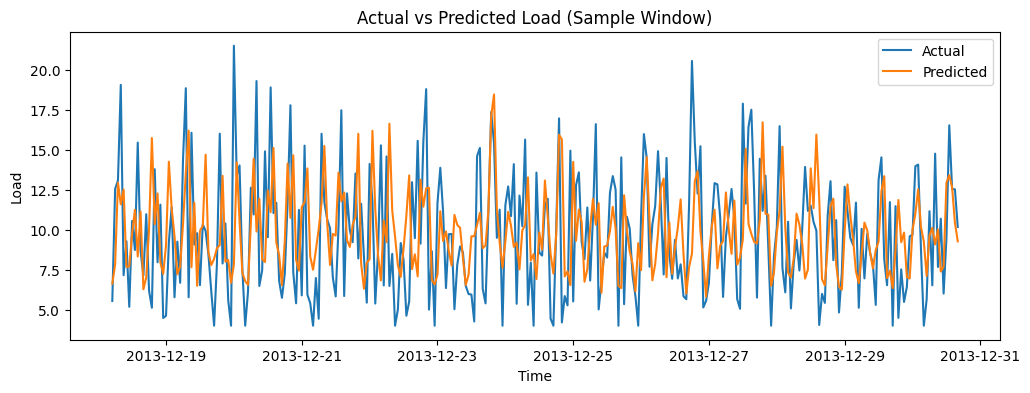

In [11]:
plt.figure(figsize=(12,4))
plt.plot(df_merge["timestamp"][:300], df_merge["consumption"][:300], label="Actual")
plt.plot(df_merge["timestamp"][:300], df_merge["pred_xgb"][:300], label="Predicted")
plt.legend()
plt.title("Actual vs Predicted Load (Sample Window)")
plt.xlabel("Time")
plt.ylabel("Load")
plt.show()

MAE / RMSE 계산

In [14]:
mae = mean_absolute_error(df_merge["consumption"], df_merge["pred_xgb"])

mse = mean_squared_error(df_merge["consumption"], df_merge["pred_xgb"])
rmse = np.sqrt(mse)

metrics = pd.DataFrame({
    "Metric": ["MAE", "RMSE"],
    "Value": [mae, rmse]
})

metrics

,Metric,Value
0,MAE,3.221693
1,RMSE,4.017010


### 결론

AMI는 단순한 계측 인프라가 아니라, 예측 기반 제어 구조의 출발점에 해당한다.  
본 결과는 부하 예측이 성능 향상을 위한 선택 요소가 아니라, 이후 EMS 및 ESS 제어 의사결정이 가능해지기 위한 구조적 전제 조건임을 확인한다.